In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [3]:
dff1 = pd.read_csv(r"C:\Users\psath\Downloads\DL Assignmet -1\demo_data\demo_data\7.xor.csv", header = None)

In [4]:
dff1.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [5]:
dff1.shape

(500, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

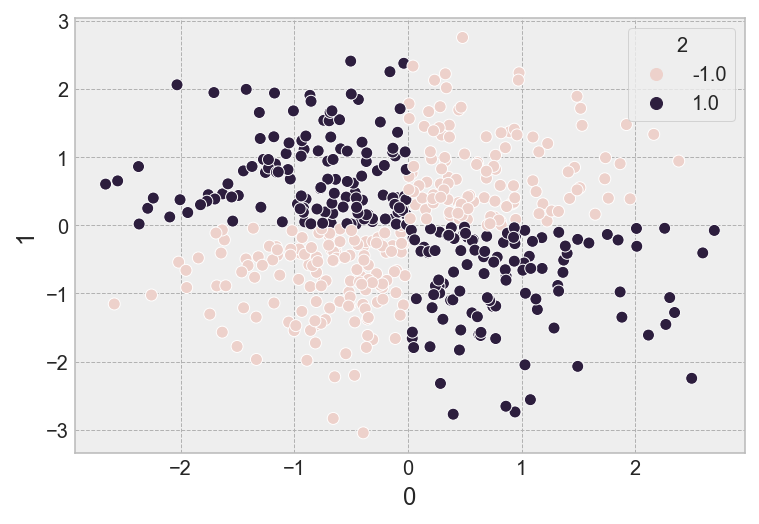

In [6]:
sns.scatterplot(x = dff1[0], y = dff1[1], hue = dff1[2])

In [7]:
from sklearn.model_selection import train_test_split
x = dff1[[0,1]]
y = dff1[2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)

In [9]:
model = Sequential()
model.add(Dense(5, activation = "relu",kernel_initializer= "he_uniform" ,input_dim = 2))
model.add(Dense(1, activation = "sigmoid"))

In [10]:
wei = model.get_weights()

In [11]:
wei[0] = np.ones(wei[0].shape)
wei[1] = np.ones(wei[1].shape)
wei[2] = np.ones(wei[2].shape)
wei[3] = np.ones(wei[3].shape)

In [12]:
model.set_weights(wei)

In [13]:
model.get_weights()

[array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics = ["accuracy"])

In [16]:
history = model.fit(x_train_transformed, y_train, batch_size=10, epochs = 50, validation_split= 0.2)

Epoch 1/50
36/36 [==============================] - 0s 4ms/step - loss: 8.1851 - accuracy: 0.4694 - val_loss: 3.9652 - val_accuracy: 0.5333
Epoch 2/50
36/36 [==============================] - 0s 1ms/step - loss: 7.7224 - accuracy: 0.4694 - val_loss: 3.7582 - val_accuracy: 0.5333
Epoch 3/50
36/36 [==============================] - 0s 1ms/step - loss: 7.2795 - accuracy: 0.4694 - val_loss: 3.5547 - val_accuracy: 0.5333
Epoch 4/50
36/36 [==============================] - 0s 1ms/step - loss: 6.8503 - accuracy: 0.4694 - val_loss: 3.3645 - val_accuracy: 0.5333
Epoch 5/50
36/36 [==============================] - 0s 1ms/step - loss: 6.4533 - accuracy: 0.4694 - val_loss: 3.1765 - val_accuracy: 0.5333
Epoch 6/50
36/36 [==============================] - 0s 1ms/step - loss: 6.0632 - accuracy: 0.4694 - val_loss: 3.0071 - val_accuracy: 0.5333
Epoch 7/50
36/36 [==============================] - 0s 1ms/step - loss: 5.7007 - accuracy: 0.4694 - val_loss: 2.8393 - val_accuracy: 0.5333
Epoch 8/50
36/36 [==

In [17]:
y_cap=model.predict(x_test_transformed)

2/2 [==============================] - 0s 0s/step


In [18]:
y_capfi = np.where(y_cap>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capfi)

0.0

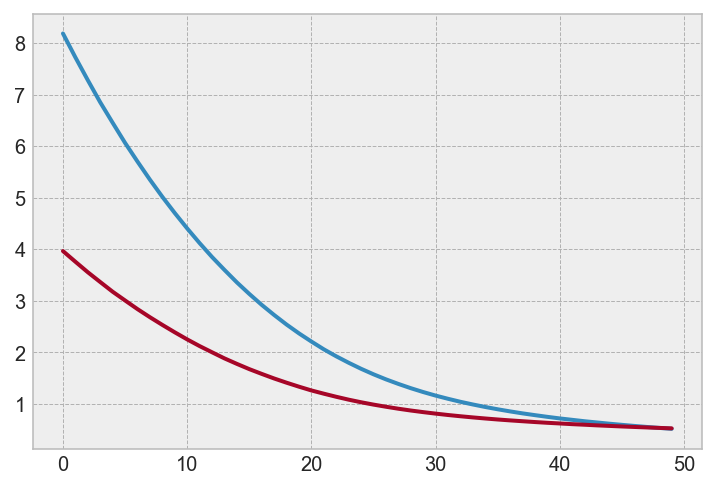

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [21]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 4s 969us/step


<AxesSubplot:>

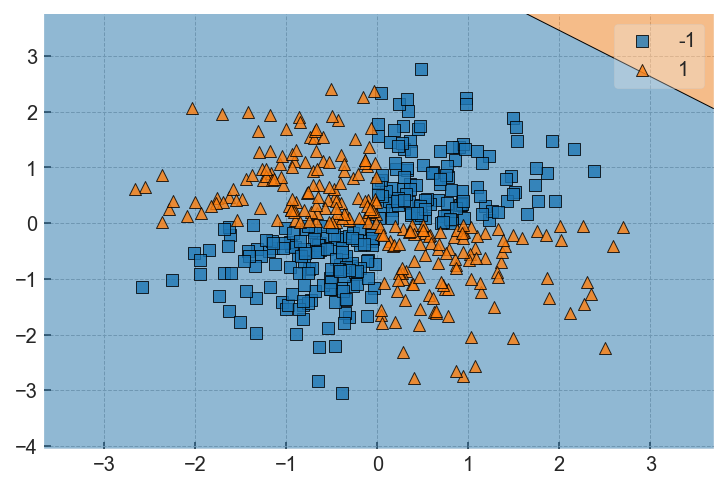

In [22]:
plot_decision_regions(dff1[[0,1]].values, dff1[2].values.astype(int), clf=model)